# Case Study - Identifying Relavant US Economy News Articles
The dataset below consists of 8000 news articles annotated with whether or not they're relavant to US economy (i.e., a yes/no binary classification). The dataset is known to be imbalanced.

#Reading the data and basic EDA

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('/content/full_economic_news_articles.csv',encoding='latin1')
df.head()

,relevance,articleid,date,headline,text
0,yes,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,no,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,no,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,no,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,yes,wsj_398838054,10-04-2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [101]:
df.shape

(8000, 5)

In [102]:
# Relevant Article: Talks about Economy
df.loc[0,'text']

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [103]:
# Non Relevant Article: Looks like talking about Health Insurance
df.loc[1,'text']

'The Wall Street Journal Online</br></br>The Morning Brief, a look at the day\'s biggest news, is emailed to subscribers by 7 a.m. every business day. Sign up for the e-mail here.</br></br>On Friday evening, with Congress out of town on its summer recess and Americans heading into a mid-August weekend, the Bush administration sent a message to the states: The federal government will make it tougher for a national children\'s insurance program to cover the offspring of middle-income families.</br></br>The State Children\'s Health Insurance Program was created in 1997 to help children whose families couldn\'t afford insurance but didn\'t qualify for Medicaid, and administration officials tell the New York Times that the changes are aimed at returning the program to its low- income focus and assuring it didn\'t become a replacement for private insurance. Administration point man Dennis Smith wrote to state officials saying there would be new restrictions on the District of Columbia and th

In [104]:
#Distribution on target variable looks non-uniform
df['relevance'].value_counts(normalize=True)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [105]:
df['relevance'].unique()

array(['yes', 'no', 'not sure'], dtype=object)

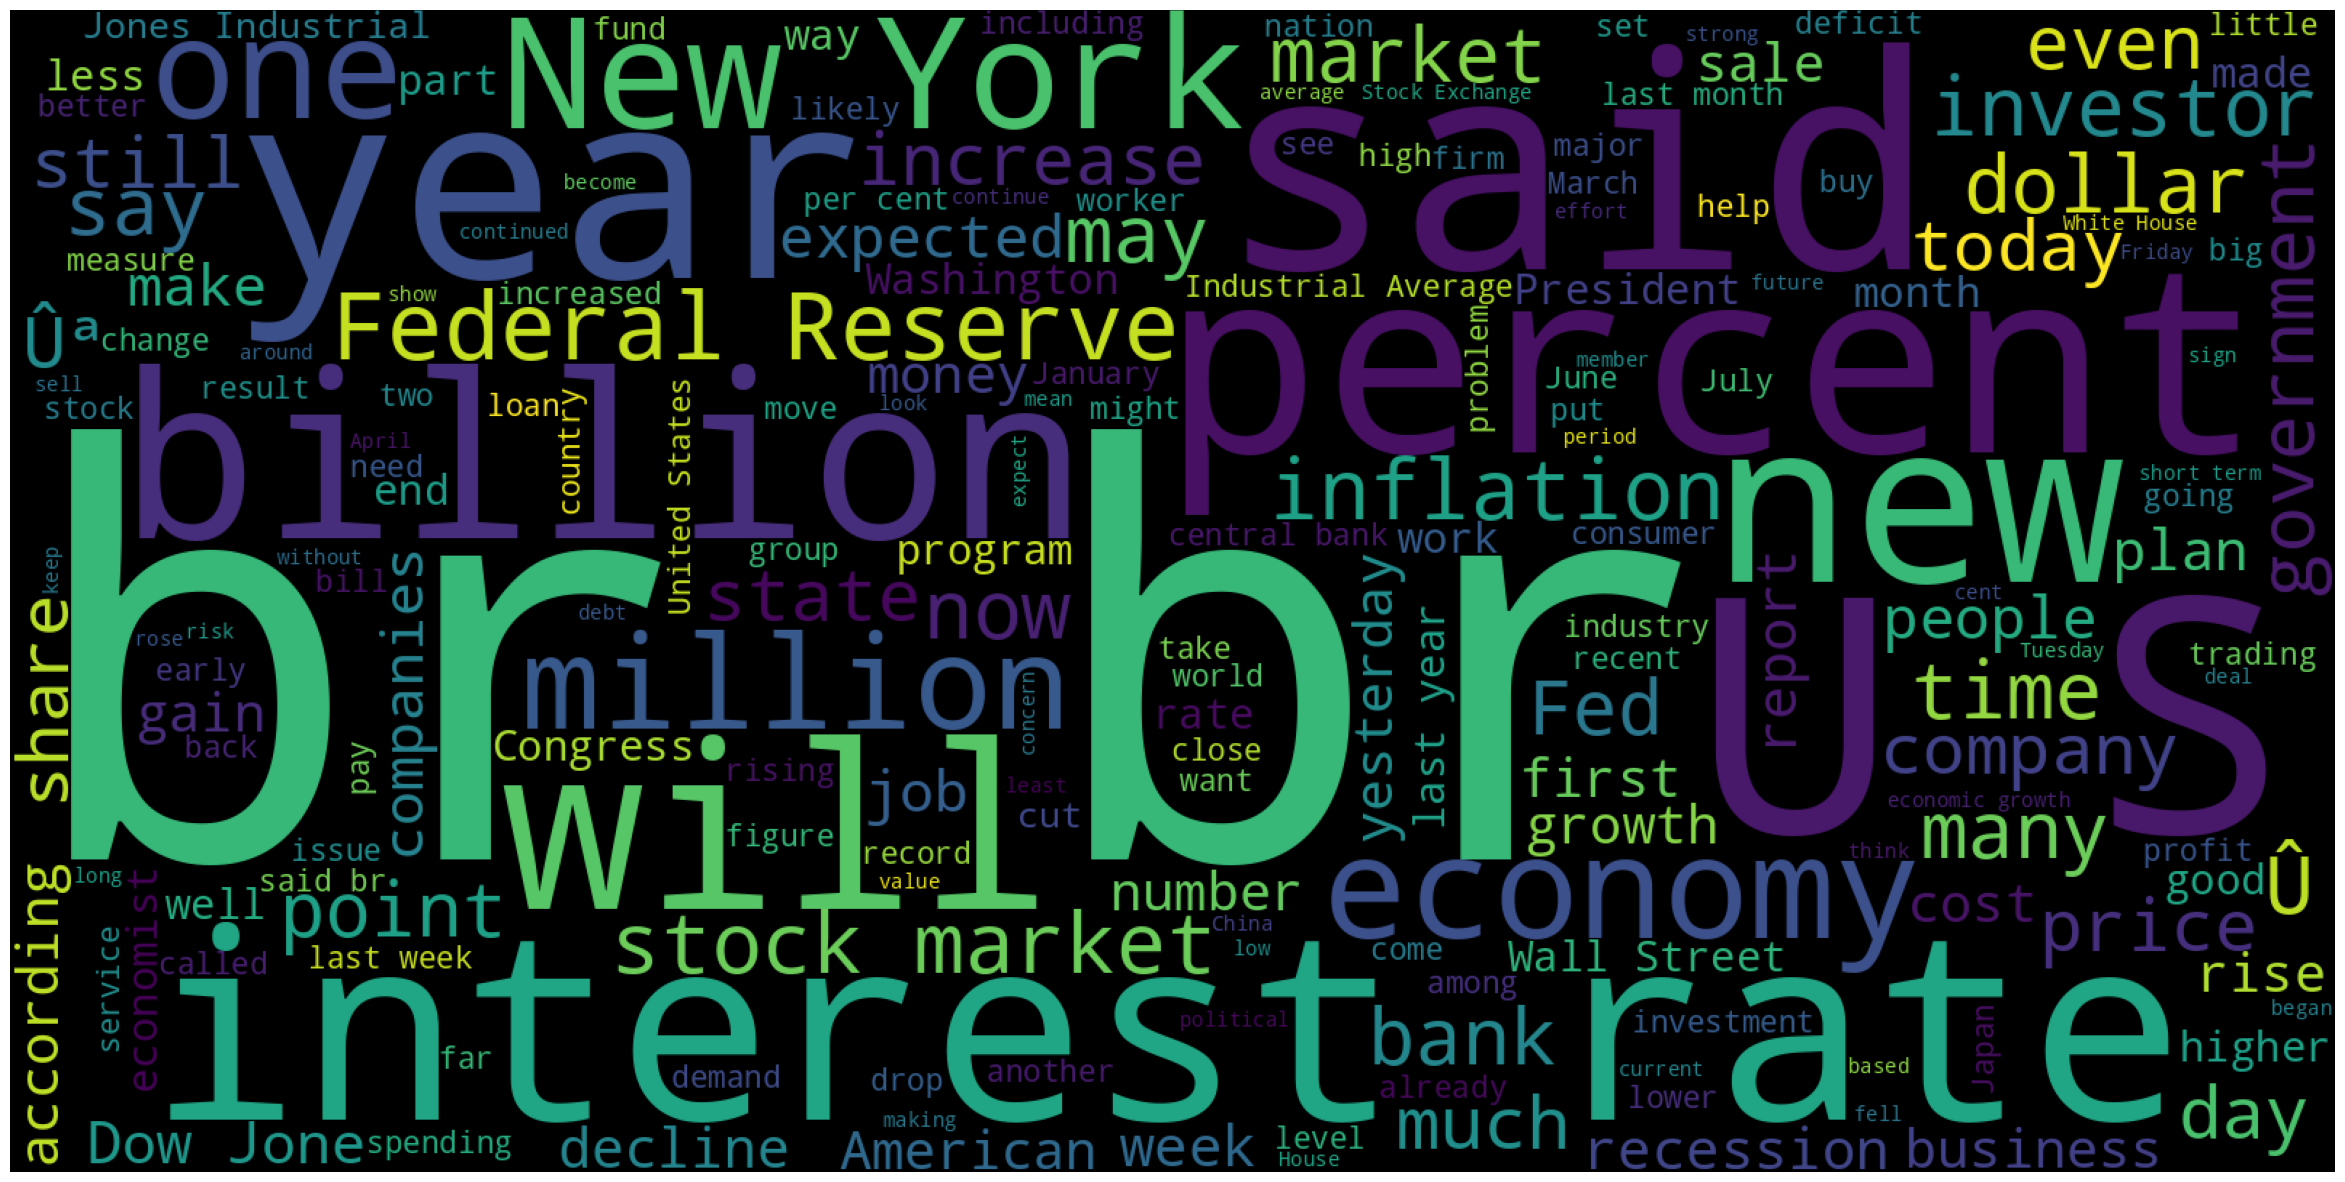

In [106]:
# Visuallizing an overall Word Cloud from the given data
from wordcloud import WordCloud

wc=WordCloud(background_color='black',width=1600,height=800).generate(" ".join(df['text']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

There is an imbalance in the data with not relevant being 82% in the dataset. That is, most of the articles are not relevant to US Economy, which makes sense in a real-world scenario, as news articles discuss various topics. We should keep this class imbalance mind when interpreting the classifier performance later. Let us first convert the class labels into binary outcome variables for convenience. 1 for Yes (relevant), and 0 for No (not relevant), and ignore "Not sure".

In [107]:
# removing the data where we don't want relevance="not sure".
df=df[df['relevance']!= 'not sure']
df.shape

(7991, 5)

In [108]:
df['relevance'].head()

0    yes
1     no
2     no
3     no
4    yes
Name: relevance, dtype: object

In [109]:
# convert label to a numerical variable
df['relevance']=df['relevance'].map({'yes':1,'no':0})
df=df[['relevance','text']]
df.shape

(7991, 2)

# Step 1 - Identify Input and Output



In [110]:
# Step 1: Identify Input and Output
X=df.text # the column text contains textual data to extract features from
y=df.relevance # this is the column we are learning to predict.
print(X.shape,y.shape)

(7991,) (7991,)


In [111]:
# Step 2: Split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

print(X_train.shape,y_train.shape)
print(X_train.shape,y_train.shape)

(5993,) (5993,)
(5993,) (5993,)


# Step 3 - Data Preprocessing on train data (X_train)

In [112]:
from wordcloud import WordCloud

def display_wordcloud(data):
  wc=WordCloud(background_color='black',width=1600,height=800).generate(' '.join(data))
  plt.figure(1,figsize=(30,20))
  plt.imshow(wc)
  plt.axis('off')
  plt.show()

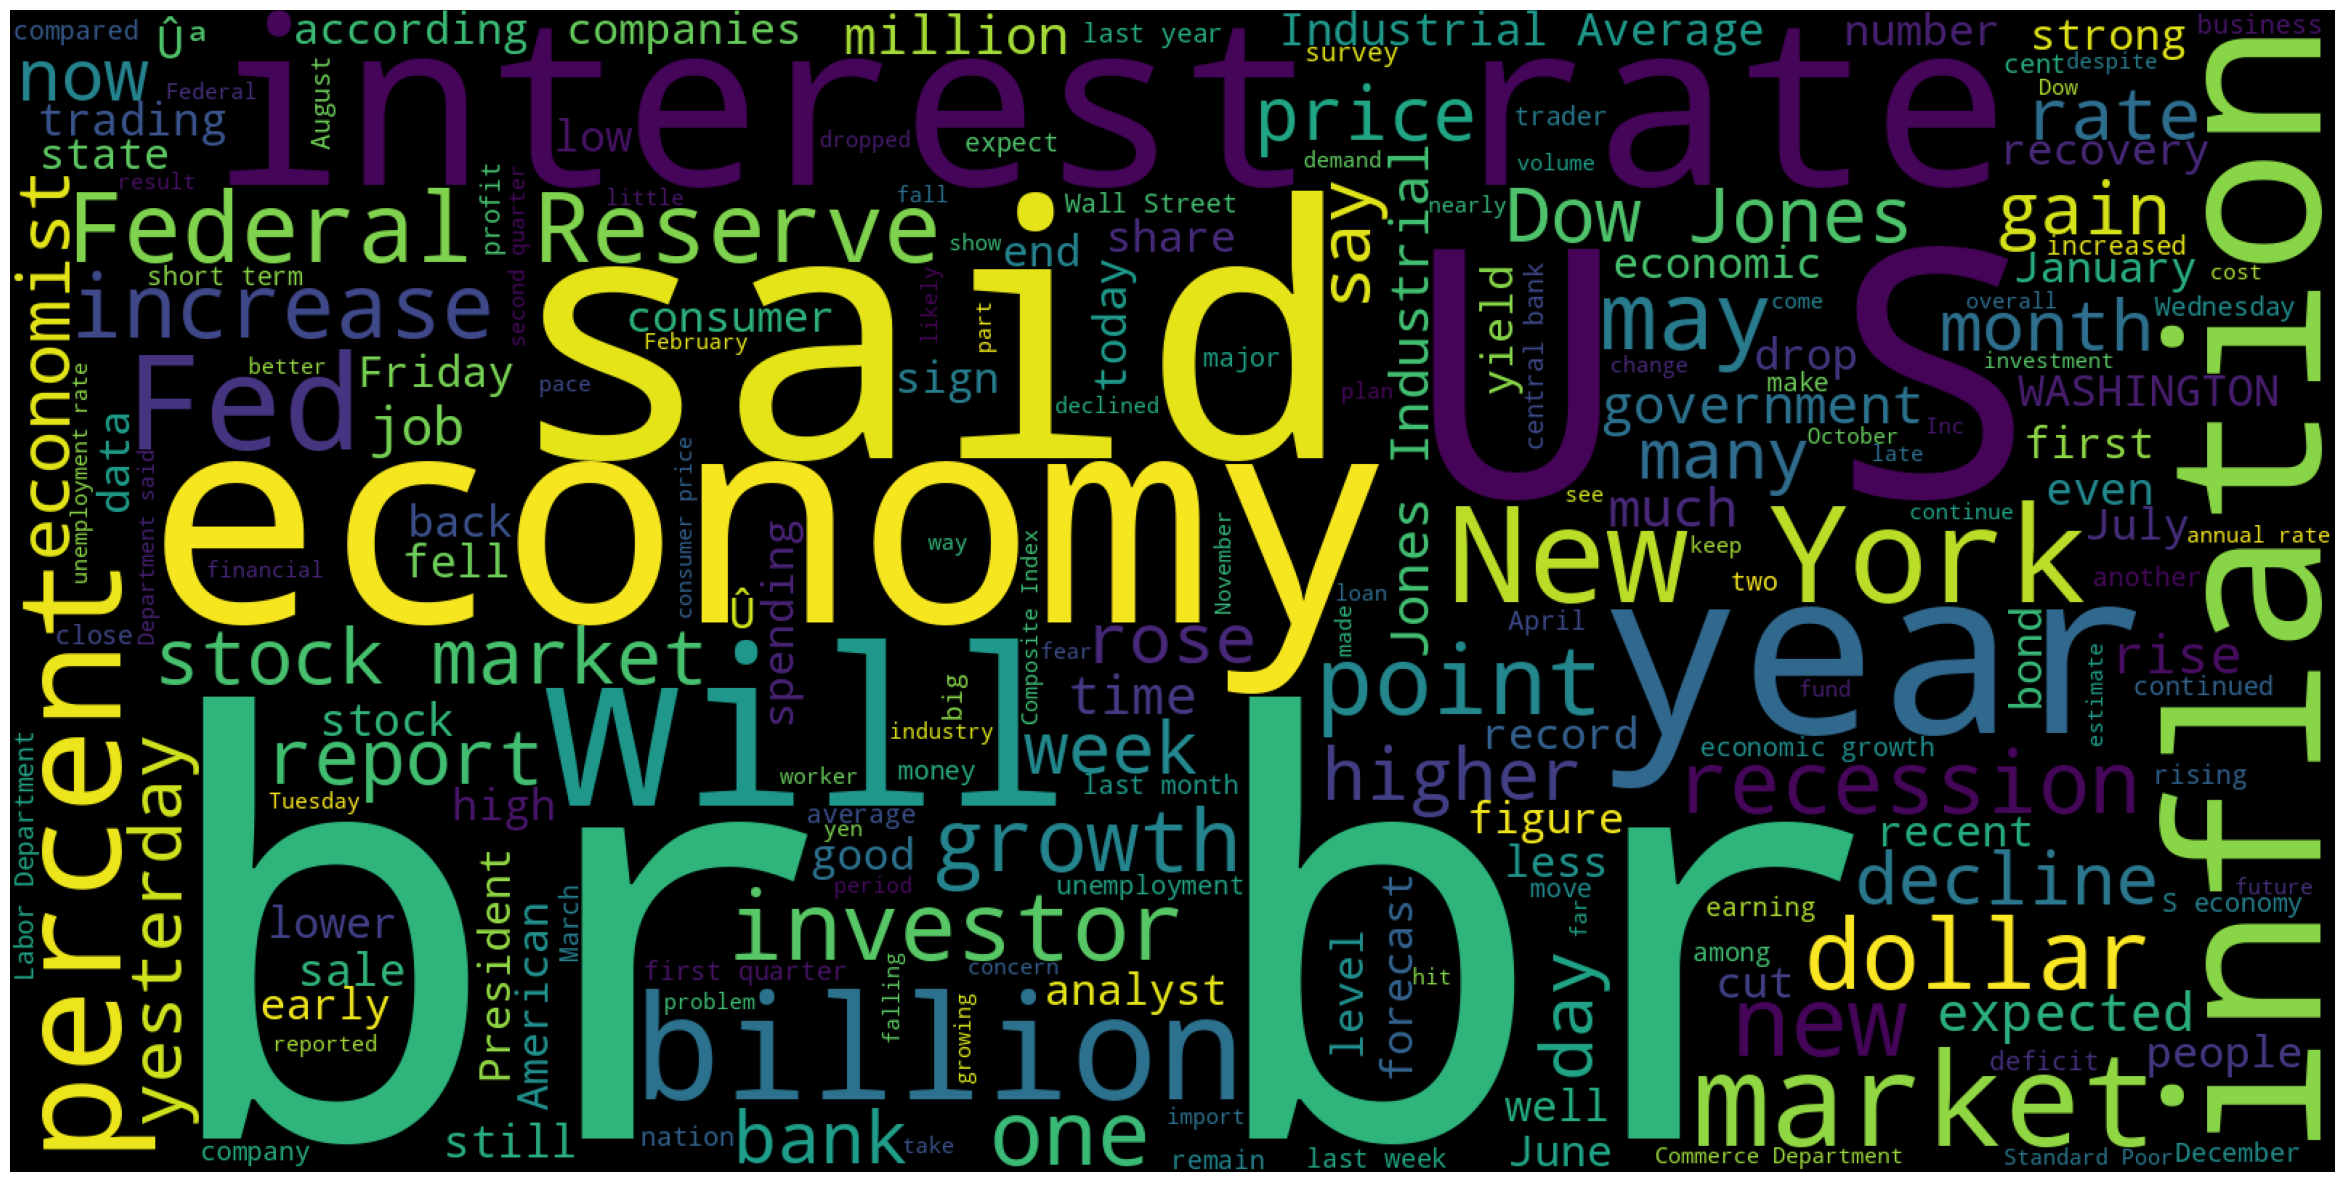

In [113]:
# Display the wordcloud for US Economy News Articles
display_wordcloud(X_train[y_train==1])

In [114]:
# Step 3: Data Preprocessing on train data (X_train)
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer=WordNetLemmatizer()

In [115]:
from warnings import filters
def clean(doc):# doc is a string of text
    # This text contains a lot of <br/> tags
    doc=doc.replace("<br>"," ")
     # Remove punctuation and numbers.
    doc =" ".join([char for char in doc  if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc= doc.lower()

    # Tokenization
    tokens= nltk.word_tokenize(doc)

     # Lemmatize
    lematize_tokens=[lemmatizer.lemmatize(tokens) for token in tokens]

    # Stop word removal
    stopwords=set(stopwords.words('english'))
    filter_tokens=[word for word in lematize_tokens if word.lower not in stopwords]

    # Join and return
    return " ".join(filter_tokens)

In [116]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vect = CountVectorizer()

# Fit the vectorizer with training data
%time X_train_dtm = vect.fit_transform(X_train)



print(X_train_dtm.shape)


CPU times: user 1.59 s, sys: 7.85 ms, total: 1.59 s
Wall time: 1.66 s
(5993, 39231)


# Step 4 - Data Preprocessing on test data (X_test)

In [117]:
# Step 4: Data Preprocessing on test data (X_test)

# transform testing data (using training data's features)
X_test_dtm= vect.transform(X_test)
print(X_test_dtm.shape)

(1998, 39231)


# Step 5 - Building a Model (i.e. Train the classifier)

In [118]:
# Step 5: Building a Model (i.e. Train the classifier)

# import classifiers from
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
%time nb.fit(X_train_dtm,y_train)

CPU times: user 13.7 ms, sys: 0 ns, total: 13.7 ms
Wall time: 18 ms


MultinomialNB()

# Step 6 - Evaluating on Train Data

In [119]:
# Step 6: Evaluate on train data
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred=nb.predict(X_train_dtm)

metrics.accuracy_score(y_train_pred,y_train)

0.8066077089938262

In [120]:
metrics.confusion_matrix(y_train_pred,y_train)

array([[4046,  270],
       [ 889,  788]])

Text(0.5, 23.52222222222222, 'Predicted')

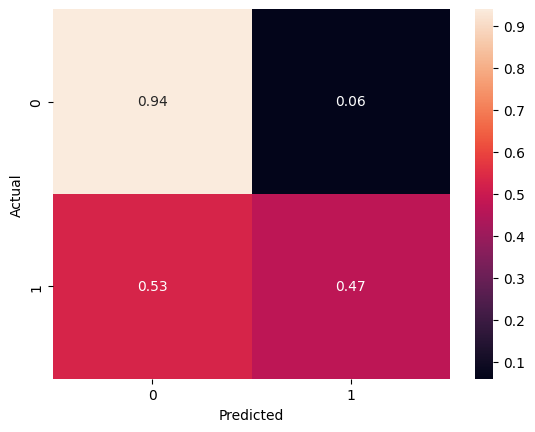

In [121]:
cm=metrics.confusion_matrix(y_train_pred,y_train)
actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)

sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=nb.classes_,yticklabels=nb.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")

# Step 7 - Evaluate on Test Data

In [122]:
# Step 7: Evaluate on test data
# make class predictions for X_test_dtm

y_test_pred=nb.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_test_pred)

0.7457457457457457

Text(0.5, 23.52222222222222, 'Predicted')

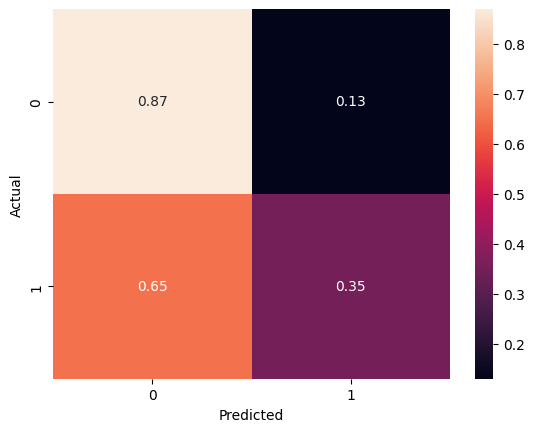

In [123]:
cm= metrics.confusion_matrix(y_test_pred,y_test)
actual=np.sum(cm,axis=1).reshape(-1,1)
cmn= np.round(cm/actual,2)

sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=nb.classes_,yticklabels=nb.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [150]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score
print("Train Score(f1_Score):",metrics.f1_score(y_train,y_train_pred))
print("Test Score(f1_Score):",metrics.f1_score(y_test,y_test_pred))

Train Score(f1_Score): 0.5762340036563071
Test Score(f1_Score): 0.41365461847389556


At this point, we can notice that the classifier is doing poorly with identifying relevant articles, while it is doing well with non-relevant ones.

**Potential Reasons for poor classifier performance**

  1.Perhaps we need to balance the data - Clearly there is class imbalance

  2. Perhaps we need a better learning algorithm - Implement Logistic Regression, SVM, RF, etc...
  3. Perhaps we should look for tuning the classifier's parameter with the help of Hyperparameter Tuning
  4. Perhaps we need a better pre-processing and feature extraction mechanism - Right now we have a sparse and large feature vector

**Let's work with potential reason number 4.**

Our large feature vector could be creating a lot of noise in the form of very rarely occurring features that are not useful for learning. Let us change the count vectorizer to take a certain number of features as maximum.

# Going Back and Applying all the Steps Again

In [152]:
vect=CountVectorizer(preprocessor=clean,max_features=5000)
%time X_train_dtm=vect.fit_transform(X_train)

X_test_dtm=vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

CPU times: user 2.26 s, sys: 8.97 ms, total: 2.27 s
Wall time: 3 s
(5993, 5000) (1998, 5000)


In [153]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
%time nb.fit(X_train_dtm,y_train)


CPU times: user 9.32 ms, sys: 995 µs, total: 10.3 ms
Wall time: 13.1 ms


MultinomialNB()

In [154]:
y_train_pred=nb.predict(X_train_dtm)
metrics.f1_score(y_train,y_train_pred)

0.4807748752568241

Text(50.722222222222214, 0.5, 'Predicted')

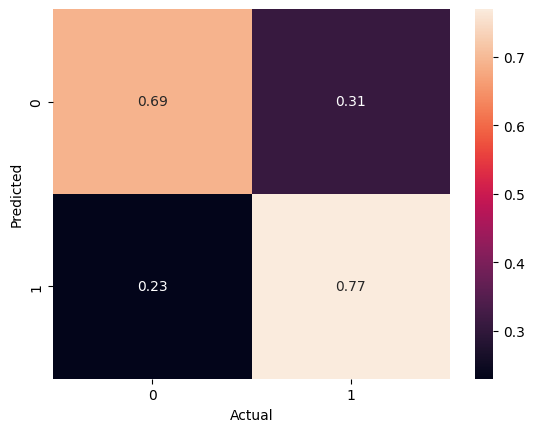

In [155]:
cm=metrics.confusion_matrix(y_train,y_train_pred)

actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)

sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=nb.classes_,yticklabels=nb.classes_)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [156]:
y_test_pred=nb.predict(X_test_dtm)
metrics.f1_score(y_train,y_train_pred)


0.4807748752568241

Text(50.722222222222214, 0.5, 'Actulal')

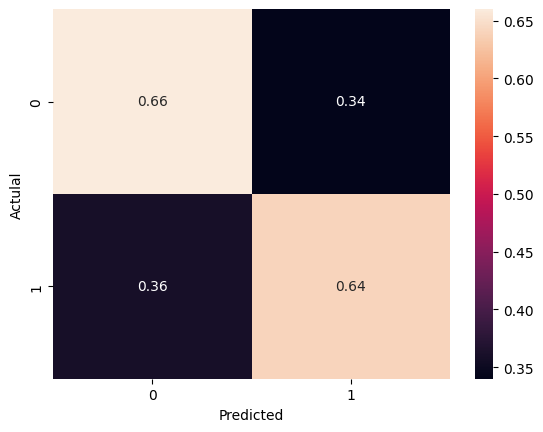

In [157]:
cm=metrics.confusion_matrix(y_test,y_test_pred)

actual=np.sum(cm,axis=1).reshape(-1,1)
cmn=np.round(cm/actual,2)

sns.heatmap(cmn,annot=True,fmt='.2f',xticklabels=nb.classes_,yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actulal")


# Clearly, the performance on relevance classification got better.

# Creating an Optimal Workflow
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [124]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


In [125]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define clean function if not defined
def clean(text):
    # Implement your text cleaning/preprocessing here
    return text

pipe = Pipeline([
    ('vectorization', CountVectorizer()),
    ('nb', MultinomialNB())
])

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor': [clean],
                   'vectorization__max_features': MAX_FEATURES,
                   'nb__alpha': ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Assuming X_train, y_train, X_test, and y_test are defined somewhere
import time
start_time = time.time()

clf.fit(X_train, y_train)

print("Best parameters found on train set")
print(clf.best_params_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

print("Execution time: %s seconds" % (time.time() - start_time))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found on train set
{'nb__alpha': 1, 'vectorization__max_features': 1000, 'vectorization__preprocessor': <function clean at 0x7a1b9d0ec670>}

Score on Test Data:  0.4014209591474245
Execution time: 75.97702479362488 seconds


In [127]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]

)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1min 16s, sys: 216 ms, total: 1min 16s
Wall time: 1min 19s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7a1b9d0ec670>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.4014209591474245


# Caching to optimize the runtime
Caching is a technique used in software engineering to improve performance by storing frequently accessed or computed data in a temporary storage location, known as a cache. The purpose of caching is to reduce the time and resources required to access or compute the same data repeatedly.

We can create the **Memory** object to cache the intermediate results of vectorization.

This will avoid redundant computations of vectorization during the grid search, thereby optimizing the runtime. Adjust the cachedir parameter as needed to specify the location for caching the results.

In [128]:
import joblib
import os
from joblib import Memory

In [129]:
# Define a memory object to cache intermediate results
cachedir='.cache'
memory=Memory(location=cachedir,verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES,
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 41.2 s, sys: 183 ms, total: 41.4 s
Wall time: 41.7 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=1000,
                                 preprocessor=<function clean at 0x7a1b9d0ec670>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.4014209591474245


In [130]:
# Serialization
best_model=clf.best_estimator_
joblib.dump(best_model,'/content/demo_model_nb.pkl')

['/content/demo_model_nb.pkl']

In [131]:
model=joblib.load('/content/demo_model_nb.pkl')
new_data = [
    """Inflation in the 20-nation euro zone eased to 2.6% in February,
    flash figures showed on Friday, but both the headline and core
    figures were higher than expected.
    Economists polled by Reuters had forecast a headline reading of 2.5%.
    Core inflation, stripping out volatile components of energy, food,
    alcohol and tobacco, was 3.1% — above the 2.9% expected.
    The European Union statistics agency said food, alcohol and tobacco
    had the highest inflation rate in February at 4%, followed by services
    at 3.9%.
    Energy prices, which had swollen last year as a result of Russia’s
    invasion of Ukraine, continued to reduce, with the rate of deflation
    moving from -6.1% to -3.7%.
    The headline print previously came in at 2.8% in January, with further
    easing expected after price rises cooled in Germany, France and Spain.
    Investors are hunting for clues on when the European Central Bank will
    start to bring down interest rates, with market pricing pointing to a
    June cut. Yet many ECB officials still stress that they need spring wage
    negotiations to conclude before they have a clearer picture of domestic
    inflationary pressures.
    The February figures will be a mixed bag for policymakers, as core
    inflation is holding above 3% even as the headline rate moves toward
    the ECB’s 2% target. Price rises have nonethless cooled significantly
    from their peak of 10.6% in October 2022.""",
    """While many of the responses online appeared lighthearted, the posts
    show just how quickly and easily misinformation can spread on social
    media. The response also underscores an uptick in interest in extraterrestrial
    activity, from hearings in Congress last summer about “unidentified aerial
    phenomena” or “UAPs” to Mexico’s Congress showing off what it claimed were
    “nonhuman” aliens. Both of those events also became prime meme fodder.
    However, Vega said aliens had nothing to do with Monday’s incident.
    “There were no aliens,” he wrote in the email. “No airports were closed.
    Nothing is being withheld from the public. LOL.”
    Still, by Friday afternoon, “Miami Mall Alien” was trending on the social
    media site X.
    “10ft Aliens/Creatures (caught on camera?) fired at inside and outside Miami
    Mall, media silent, cops are covering it up saying kids were fighting with
    fireworks, yet all these cop cars, & air traffic stopped that night except for
    black military choppers…and no media coverage,” claimed one post on X, which on
    Friday appeared to trigger a slew of conspiracy theories and memes.
    One person posted what appeared to be an AI image of a generic alien holding
    shopping bags, and joked it was “The Miami Mall Alien.” """
]
prediction=model.predict(new_data)
print("Prediction:",prediction)

Prediction: [1 0]


# Here 1 means 'relevant' and 0 means 'not relevant'.

In [132]:
%time y_test_predict=model.predict(X_test)

print('Test Score f1:',metrics.f1_score(y_test,y_test_predict))

CPU times: user 621 ms, sys: 2.84 ms, total: 623 ms
Wall time: 660 ms
Test Score f1: 0.4014209591474245


In [133]:
print("Model Size:",os.path.getsize('/content/demo_model_nb.pkl'),"Bytes")

Model Size: 516375 Bytes


# Implementing Memoization to further improve the runtime
As a software engineer, besides caching, you can employ several techniques to improve the time complexity of your code. Implement **memoization** to store the results of expensive function calls and reuse them when the same inputs occur again. This is particularly useful for dynamic programming problems.

In [134]:
%time X_train_clean=X_train.apply(lambda doc:clean(doc))

CPU times: user 5.91 ms, sys: 0 ns, total: 5.91 ms
Wall time: 8.76 ms


In [135]:
%time X_test_clean=X_test.apply(lambda doc:clean(doc))

CPU times: user 1.89 ms, sys: 0 ns, total: 1.89 ms
Wall time: 2.54 ms


In [136]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ],
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 45.4 s, sys: 195 ms, total: 45.6 s
Wall time: 48.7 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('nb', MultinomialNB(alpha=10))])

Score on Test Data:  0.39858906525573184


In [137]:
# Serialization
best_model=clf.best_estimator_
joblib.dump(best_model,'/content/demo_model_nb_unclean.pkl')

['/content/demo_model_nb_unclean.pkl']

In [138]:
model=joblib.load("/content/demo_model_nb_unclean.pkl")

new_data = [
    """Inflation in the 20-nation euro zone eased to 2.6% in February,
    flash figures showed on Friday, but both the headline and core
    figures were higher than expected.
    Economists polled by Reuters had forecast a headline reading of 2.5%.
    Core inflation, stripping out volatile components of energy, food,
    alcohol and tobacco, was 3.1% — above the 2.9% expected.
    The European Union statistics agency said food, alcohol and tobacco
    had the highest inflation rate in February at 4%, followed by services
    at 3.9%.
    Energy prices, which had swollen last year as a result of Russia’s
    invasion of Ukraine, continued to reduce, with the rate of deflation
    moving from -6.1% to -3.7%.
    The headline print previously came in at 2.8% in January, with further
    easing expected after price rises cooled in Germany, France and Spain.
    Investors are hunting for clues on when the European Central Bank will
    start to bring down interest rates, with market pricing pointing to a
    June cut. Yet many ECB officials still stress that they need spring wage
    negotiations to conclude before they have a clearer picture of domestic
    inflationary pressures.
    The February figures will be a mixed bag for policymakers, as core
    inflation is holding above 3% even as the headline rate moves toward
    the ECB’s 2% target. Price rises have nonethless cooled significantly
    from their peak of 10.6% in October 2022.""",
    """While many of the responses online appeared lighthearted, the posts
    show just how quickly and easily misinformation can spread on social
    media. The response also underscores an uptick in interest in extraterrestrial
    activity, from hearings in Congress last summer about “unidentified aerial
    phenomena” or “UAPs” to Mexico’s Congress showing off what it claimed were
    “nonhuman” aliens. Both of those events also became prime meme fodder.
    However, Vega said aliens had nothing to do with Monday’s incident.
    “There were no aliens,” he wrote in the email. “No airports were closed.
    Nothing is being withheld from the public. LOL.”
    Still, by Friday afternoon, “Miami Mall Alien” was trending on the social
    media site X.
    “10ft Aliens/Creatures (caught on camera?) fired at inside and outside Miami
    Mall, media silent, cops are covering it up saying kids were fighting with
    fireworks, yet all these cop cars, & air traffic stopped that night except for
    black military choppers…and no media coverage,” claimed one post on X, which on
    Friday appeared to trigger a slew of conspiracy theories and memes.
    One person posted what appeared to be an AI image of a generic alien holding
    shopping bags, and joked it was “The Miami Mall Alien.” """
]

new_data_clean=[clean(doc) for doc in new_data]
prediction=model.predict(new_data)
print("Prediction:",prediction)

Prediction: [1 0]


In [139]:
# Let's analyse the models prediction time and model size
%time y_test_pred=model.predict(X_test_clean)

print("Test Score f1",metrics.f1_score(y_test,y_test_pred))

CPU times: user 636 ms, sys: 2 ms, total: 638 ms
Wall time: 662 ms
Test Score f1 0.39858906525573184


In [140]:
print('Model Size:',os.path.getsize("/content/demo_model_nb_unclean.pkl"),'Bytes')

Model Size: 457607 Bytes


# Putting it all together: Implementing various Algorithms to find the Best Model

In [141]:
import warnings

warnings.filterwarnings('ignore')

In [143]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
         {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 1min 23s, sys: 534 ms, total: 1min 23s
Wall time: 1min 38s
Score on Test Data:  0.40414507772020725
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 7min 5s, sys: 1.65 s, total: 7min 7s
Wall time: 8min 11s
Score on Test Data:  0.24745269286754004
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 43min 8s, sys: 6.72 s, total: 43min 14s
Wall time: 47min 33s
Score on Test Data:  0.41365461847389556


In [144]:
for name,model in best_models.items():
  print(f"{name}")
  print(f"{model}")
  print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [149]:
for name,model in best_models.items():
  print("*"*10,algo,"*"*10)

  joblib.dump(model,f'/content/{name}.pkl')
  model=joblib.load(f'/content/{name}.pkl')

  %time y_test_pred=model.predict(X_test_clean)
  print("Test Score:",metrics.f1_score(y_test,y_test_pred))
  print("Model Size:",os.path.getsize(f"/content/{name}.pkl"),"Bytes")


********** logistic_regression **********
CPU times: user 736 ms, sys: 3.81 ms, total: 740 ms
Wall time: 832 ms
Test Score: 0.40414507772020725
Model Size: 685623 Bytes
********** logistic_regression **********
CPU times: user 672 ms, sys: 1.98 ms, total: 674 ms
Wall time: 689 ms
Test Score: 0.24745269286754004
Model Size: 542153 Bytes
********** logistic_regression **********
CPU times: user 421 ms, sys: 4.99 ms, total: 426 ms
Wall time: 431 ms
Test Score: 0.41365461847389556
Model Size: 646062 Bytes
